# Lab 9, Week 11: Gymnasium
![image.png](attachment:image.png)

- Let's get used to the Gymnasium, where various environments and APIs are provided!

# Installing Gymnasium

### They support Python 3.7, 3.8, 3.9, 3.10, 3.11 on Linux and macOS.
### Sadly, in Windows, Box2d environments are not supported!!!

## Today, We'll use classic control environments only
##
- Install basic gymnasium via pip. This will partially install classic control environments.

In [2]:
# type below line in cmd
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 14.4 MB/s eta 0:00:00


- You can also install other environments. However, box2d is currently not available on windows.

In [3]:
!pip install gymnasium[classic-control]
!pip install gymnasium[box2d]
!pip install gymnasium[mujoco]
!pip install gymnasium[atari]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.3.0
    Uninstalling pygame-2.3.0:
      Successfully uninstalled pygame-2.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: Could not build whee

- Making full installation (may take some time)

In [ ]:
#!pip install gymnasium[all]

# Importing Gymnasium
- Gymnasium is also a python package: you can import it as,

In [4]:
import gymnasium as gym

# There are 5 environments in Classic Control Environments:

### Acrobot-v1, CartPole-v1, MountainCar-v0, MountainCarContinuous-v0, Pendulum-v1
- Their descriptions and animations: https://gymnasium.farama.org/environments/classic_control/

In [5]:
# you can make environment object using gym.make
env = gym.make("Acrobot-v1", render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<AcrobotEnv<Acrobot-v1>>>>>

### Before using environment, we must reset it to have initial state, $s_0$
- as environments have some randomness, we can also set some seed for it
- we do not use info;

In [6]:
state, info = env.reset(seed=42)
state, info

(array([ 0.99849933,  0.0547638 ,  0.99992526, -0.01222401,  0.07171959,
         0.0394736 ], dtype=float32),
 {})

### You can visualize the state as we specified render_mode="rgb_array"

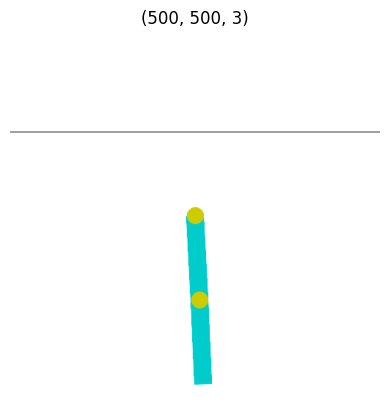

In [7]:
import matplotlib.pyplot as plt

screenshot = env.render()
plt.title(screenshot.shape) # (Width, Height, RGB channel)
plt.axis('off')
plt.imshow(screenshot)
plt.show()
plt.close()

### Now let's check action: what does environment takes?
- type of action space and some informations

In [8]:
env.action_space, env.action_space.n

(Discrete(3), 3)

- You can randomly sample an action from its action space. Execute below cell multiple times.

In [9]:
action = env.action_space.sample()
action

0

### If you deliver this action to the environment,
- environment returns next state, reward, terminated signal, truncated signal, and info (not used)
    - terminated: episode finishes because it reaches terminal state
    - truncated: agent does well, but length of episode is too long so that "truncated" by the environment

In [10]:
next_state, reward, terminated, truncated, info = env.step(action)
next_state, reward, terminated, truncated, info

(array([ 0.9971902 ,  0.07491124,  0.99948347, -0.03213749,  0.12536131,
        -0.23186578], dtype=float32),
 -1.0,
 False,
 False,
 {})

## Now repeat this: environment with random agent

In [11]:
# reset environment
state, info = env.reset(seed=42)

# initialize terminal condition
terminated, truncated = False, False
epi_steps, epi_reward = 0, 0
# repeat until episode finishes
while not (terminated or truncated):
    # sample action
    ## This is where you would insert your policy
    action = env.action_space.sample()
    
    # returns from the environment
    next_state, reward, terminated, truncated, info = env.step(action)
    
    # record
    epi_steps += 1
    epi_reward += reward
    
    # state transition
    state = next_state
    
print('Agent survived for {} steps, with reward {}'.format(epi_steps, epi_reward))
env.close()

Agent survived for 500 steps, with reward -500.0


# Running multiple episodes
- for 10 episodes, record the episode returns

In [12]:
# create environment
env = gym.make("Acrobot-v1", render_mode="rgb_array")

epi_rewards = []
num_epis = 10
for n_epi in range(num_epis):
    # reset environment when every new episode starts
    state, info = env.reset(seed=42)

    # initialize terminal condition
    terminated, truncated = False, False
    epi_steps, epi_reward = 0, 0
    # repeat until episode finishes
    while not (terminated or truncated):
        # sample action
        ## This is where you would insert your policy
        action = env.action_space.sample()

        # returns from the environment
        next_state, reward, terminated, truncated, info = env.step(action)

        # record
        epi_steps += 1
        epi_reward += reward

        # state transition
        state = next_state
        
    epi_rewards.append(epi_reward)
env.close()

# Visualization
- okay, no learning happened.

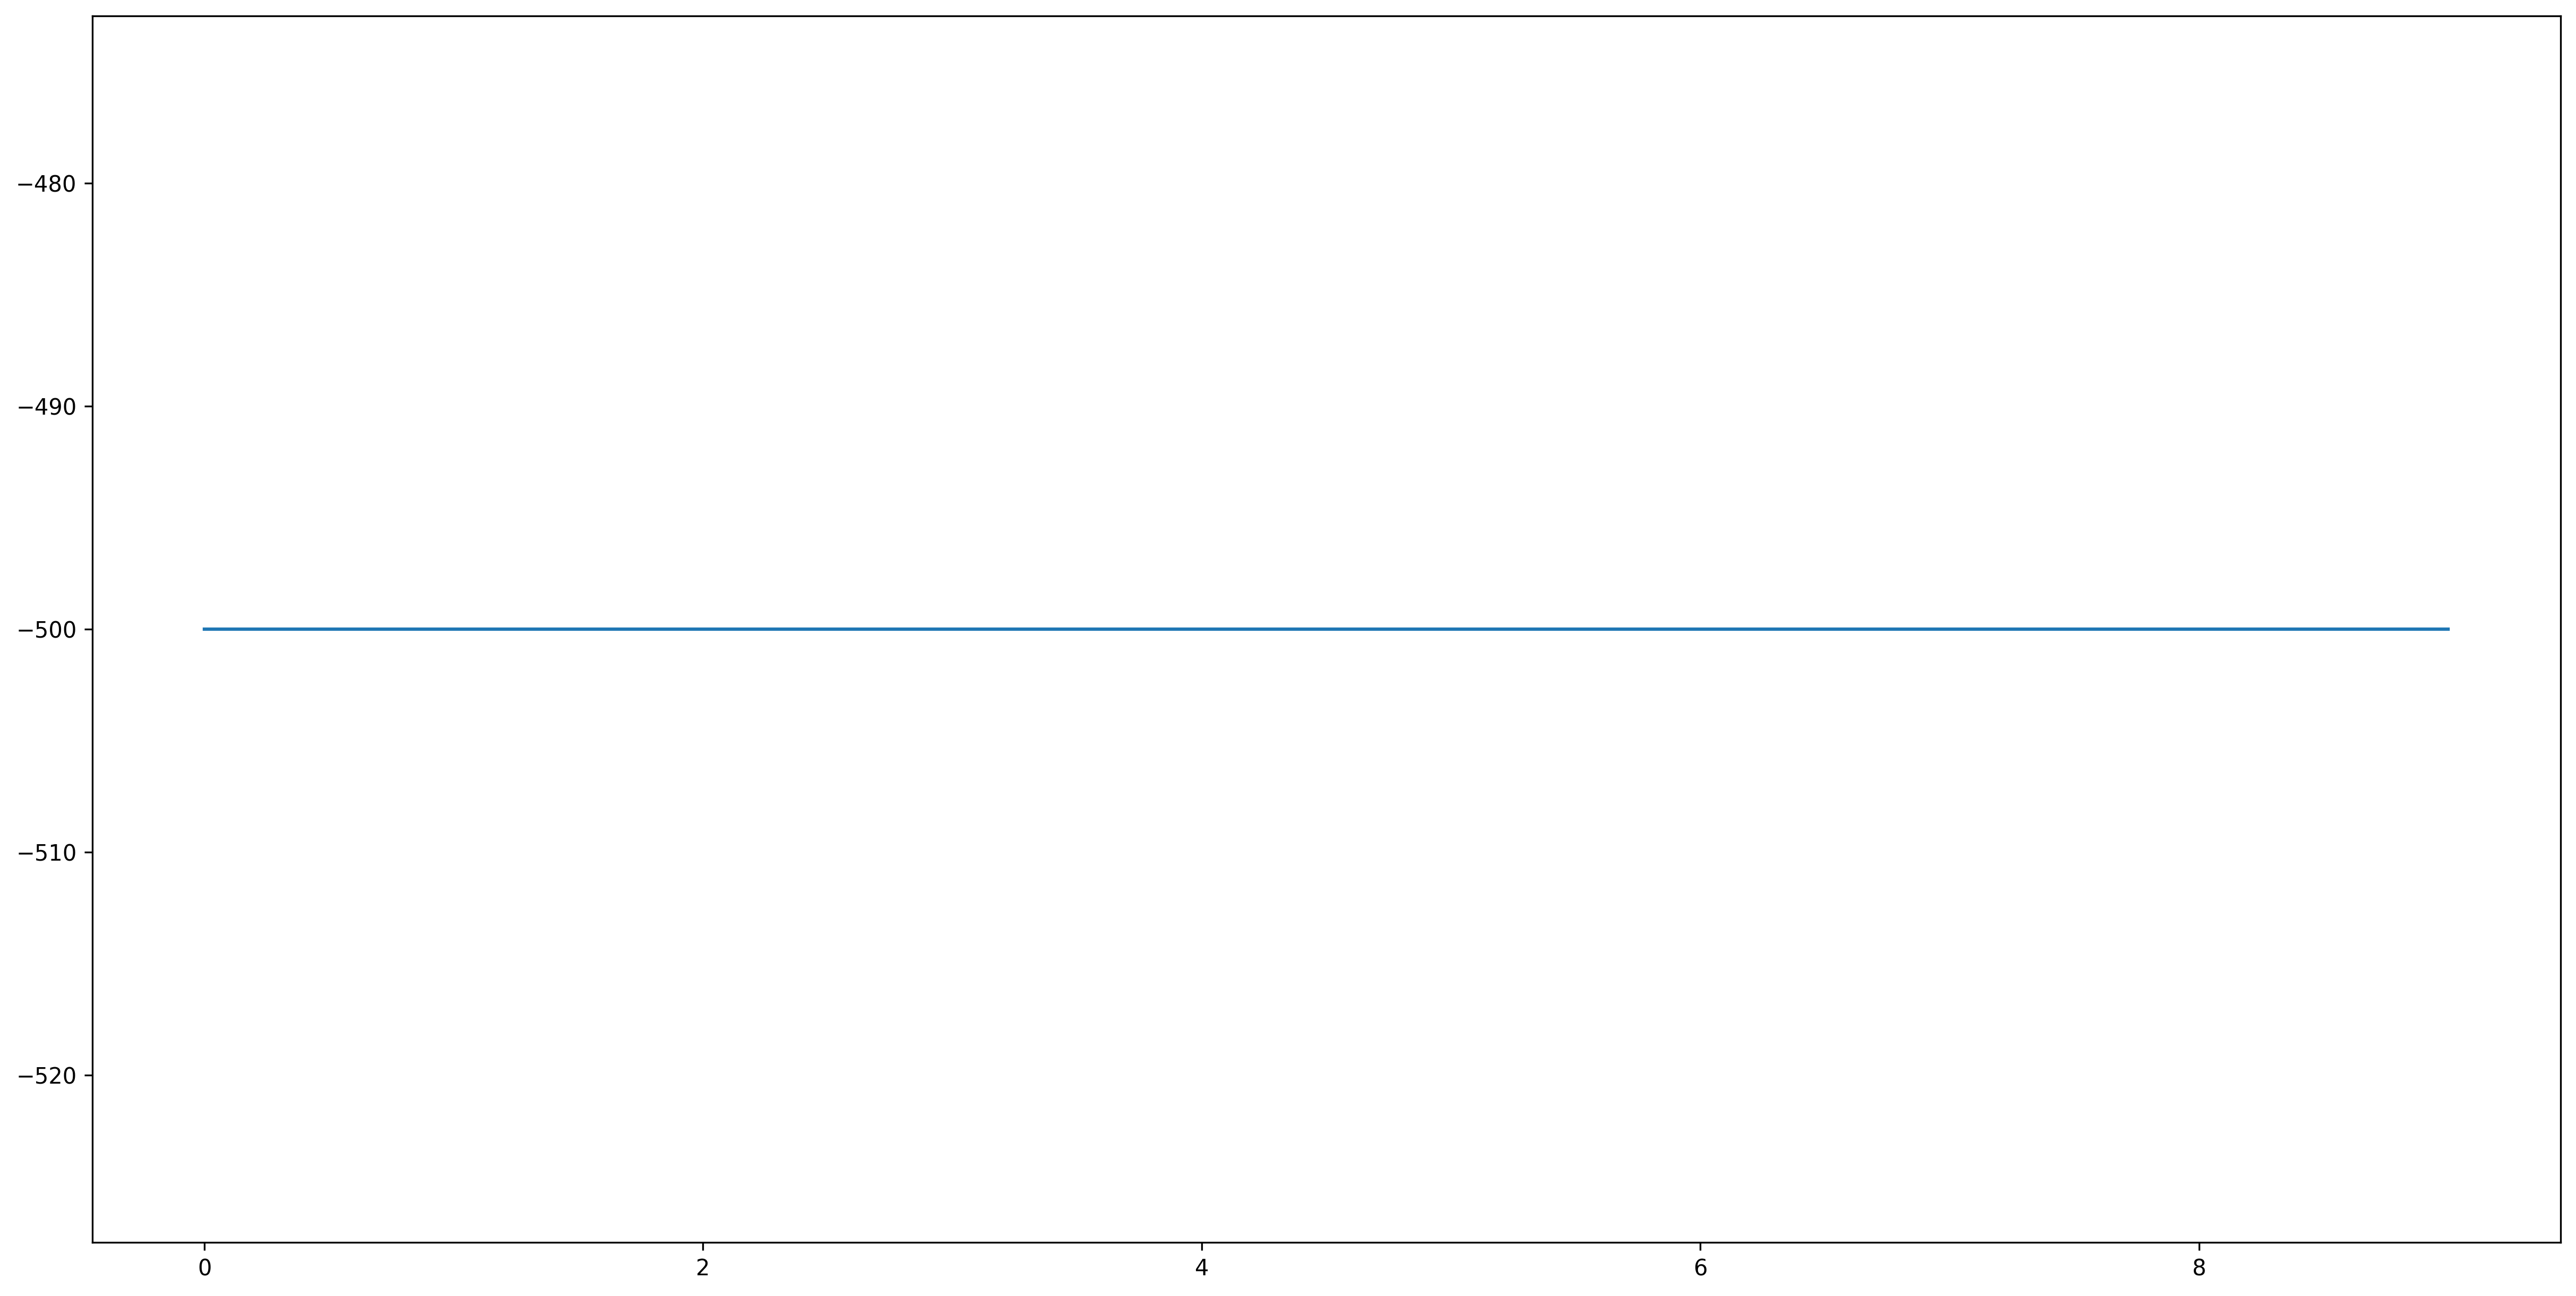

In [13]:
plt.figure(figsize=(20, 10), dpi=300)
plt.plot(epi_rewards)
plt.show()
plt.close()

# <b>Learning how to play Cartpole-v1 Environment with DQN</b>

From now on, we'll implement an agent <b>that plays Cartpole.</b>

![alt text](https://jonghyunho.github.io/assets/img/posts/20200505/cartpole_episode_100.gif)

The goal of this game is <b>to make pole not fall, as long as possible.</b> You can take one of 2 actions at each step, which is pushing cart towards <b>left or right</b>.

In [14]:
env = gym.make("CartPole-v1")

## Import the dependencies 📚

In [15]:
import math
import random
import numpy as np
import gymnasium as gym
from collections import deque

# pytorch, for neural networks
import torch
import torch.nn as nn
import torch.nn.functional as F

# visualization
from tqdm import tqdm # if you don't have tqdm, you can install it by pip
import matplotlib.pyplot as plt

# Classes and Functions for DQN 🧠
- Class
    - DQN: Model class. There are two identical DQNs exist in this framework.
         - current_dqn
         - target_dqn
    - Memory: Memory class. Implementing Experience Replay (ER) technique for DQN training
        - Save data gathered from current_dqn (called memory)
        - Give training data (randomly sampled from whole memory) to DQN

In [40]:
class DQN(nn.Module):
    def __init__(self, state_dim, hidden_dim, action_dim):
        super().__init__()
        # given those dimensions, you need to design your own q network
        # when state is given to this q network, you need to return q values for all possible actions
        self.q = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.ReLU()
        )
        
    def forward(self, state):
        return self.q(state)
    
    
class Memory():
    def __init__(self, memory_size):
        self.memory_size = memory_size
        self.memory = deque(maxlen=self.memory_size)
        
    def put(self, transition):
        self.memory.append(transition)
        
    def sample(self, batch_size):
        # you need to sample transitions from memory...
        transitions = random.sample(self.memory, batch_size)
        
        # and separate them into:
        state_list, action_list, reward_list, next_state_list, terminated_list = [], [], [], [], []
        for transition in transitions:
            state, action, reward, next_state, terminated = transition
            state_list.append(list(state))
            action_list.append([action])
            reward_list.append([reward])
            next_state_list.append(list(next_state))
            terminated_list.append([terminated])
            
        return torch.Tensor(state_list), torch.Tensor(action_list), torch.Tensor(reward_list),\
                torch.Tensor(next_state_list), torch.Tensor(terminated_list)
    
    def size(self):
        return len(self.memory)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Set hyperparameters ⚙️
- Here, we'll specify the hyperparameters
    - `𝛾`: gamma, discount rate
    - memory size: length of DQN replay buffer
    - target_update_every: frequency of updating target q-network with current q-network
    
- There are some parameters about exploration:
    - `ϵ`: epsilon (eps), exploration rate
    
## Tune if needed!

In [17]:
# DQN parameters
gamma = 0.99
memory_size = 2500

# q-network parameters
device = 'cuda:0'
hidden_dim = 64
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# learning parameters
num_epis = 500
batch_size = 128
learning_rate = 0.01
target_update_every = 2

eps = 1.0
eps_minimum = 0.01
eps_decay_rate = 0.99

In [24]:
# create instances
## two q-networks
current_dqn = DQN(state_dim, hidden_dim, action_dim).to(device)
target_dqn = DQN(state_dim, hidden_dim, action_dim).to(device)
target_dqn.load_state_dict(current_dqn.state_dict())
## optimizer
optimizer = torch.optim.Adam(current_dqn.parameters(), lr=learning_rate)

## replay buffer
replay_buffer = Memory(memory_size)

## Play and learn  🎮
- Recall DQN update formula:
![image.png](attachment:image.png)

In [76]:
def training(cur_dqn, tar_dqn, buffer, opt, gamma, batch_size):
    # sample "batch_size" amount of transitions from replay buffer
    transitions = random.sample(buffer, batch_size)
    states, actions, rewards, next_states, dones = zip(*transitions)

    states = torch.tensor(states).to(device)
    actions = torch.tensor(actions).to(device)
    rewards = torch.tensor(rewards).to(device)
    next_states = torch.tensor(next_states).to(device)

    # get q value of actions from current dqn
    q_values = cur_dqn(states)
    actions = actions.unsqueeze(1).expand(-1, q_values.size(1))
    q_value = q_values.gather(1, actions.to(torch.int64)).squeeze(1)

    # get max target q value with next state
    max_q_values = tar_dqn(next_states).max(1)[0].detach()
    max_q = torch.where(dones, torch.zeros_like(max_q_values), max_q_values)

    # compute TD target
    target = rewards + gamma * max_q * (1 - dones)
    
    # compute loss betwen current q and target q
    td_errors = q_value - target
    loss = td_errors.pow(2).mul(0.5).mean()
    
    # neural network update
    opt.zero_grad()
    loss.backward()
    # you need to clamp the gradient to prevent unstable behaviors from drastic update of weights
    for param in cur_dqn.parameters():
        param.grad.data.clamp_(-1, 1)
    opt.step()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
epi_eps, epi_rewards = [], []
buffer = []

for n_epi in tqdm(range(num_epis)):
    state, _ = env.reset() # we don't use info
    terminated, truncated = False, False
    epi_reward = 0
    
    while not (terminated or truncated):
        # Implement Epsilon-Greedy Exploration policy
        if random.random() < eps:
            action = np.random.randint(0, action_dim)
        else:
            action = np.argmax(current_dqn(state))
        
        # deliver action to state and get results
        state, action, reward, next_state, done = env.step(action)
        
        # store transition
        buffer.append([state, action, reward, next_state, done])
        
        # state transition
        state = next_state
        
        # for record
        epi_reward += reward
        
        # train if we have enough replay buffer (call training function)
        if len(buffer) >= batch_size:
            training(current_dqn, target_dqn, buffer, optimizer, gamma, batch_size)
            buffer = []
    
    # target update, for every "target_update_every" episodes:
    if n_eqi % target_update_every == 0:
        target_dqn.load_state_dict(current_dqn.load_state_dict())
        
    # decay epsilon for less exploration (more exploitation)
    # However, epsilon must not drop under "eps_minimum"
    if eps > eps_minimum:
        eps *= eps_decay_rate
    
    # records
    epi_eps.append(eps)
    epi_rewards.append(epi_reward)

  0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
  0%|          | 0/500 [00:00<?, ?it/s]


RuntimeError: ignored

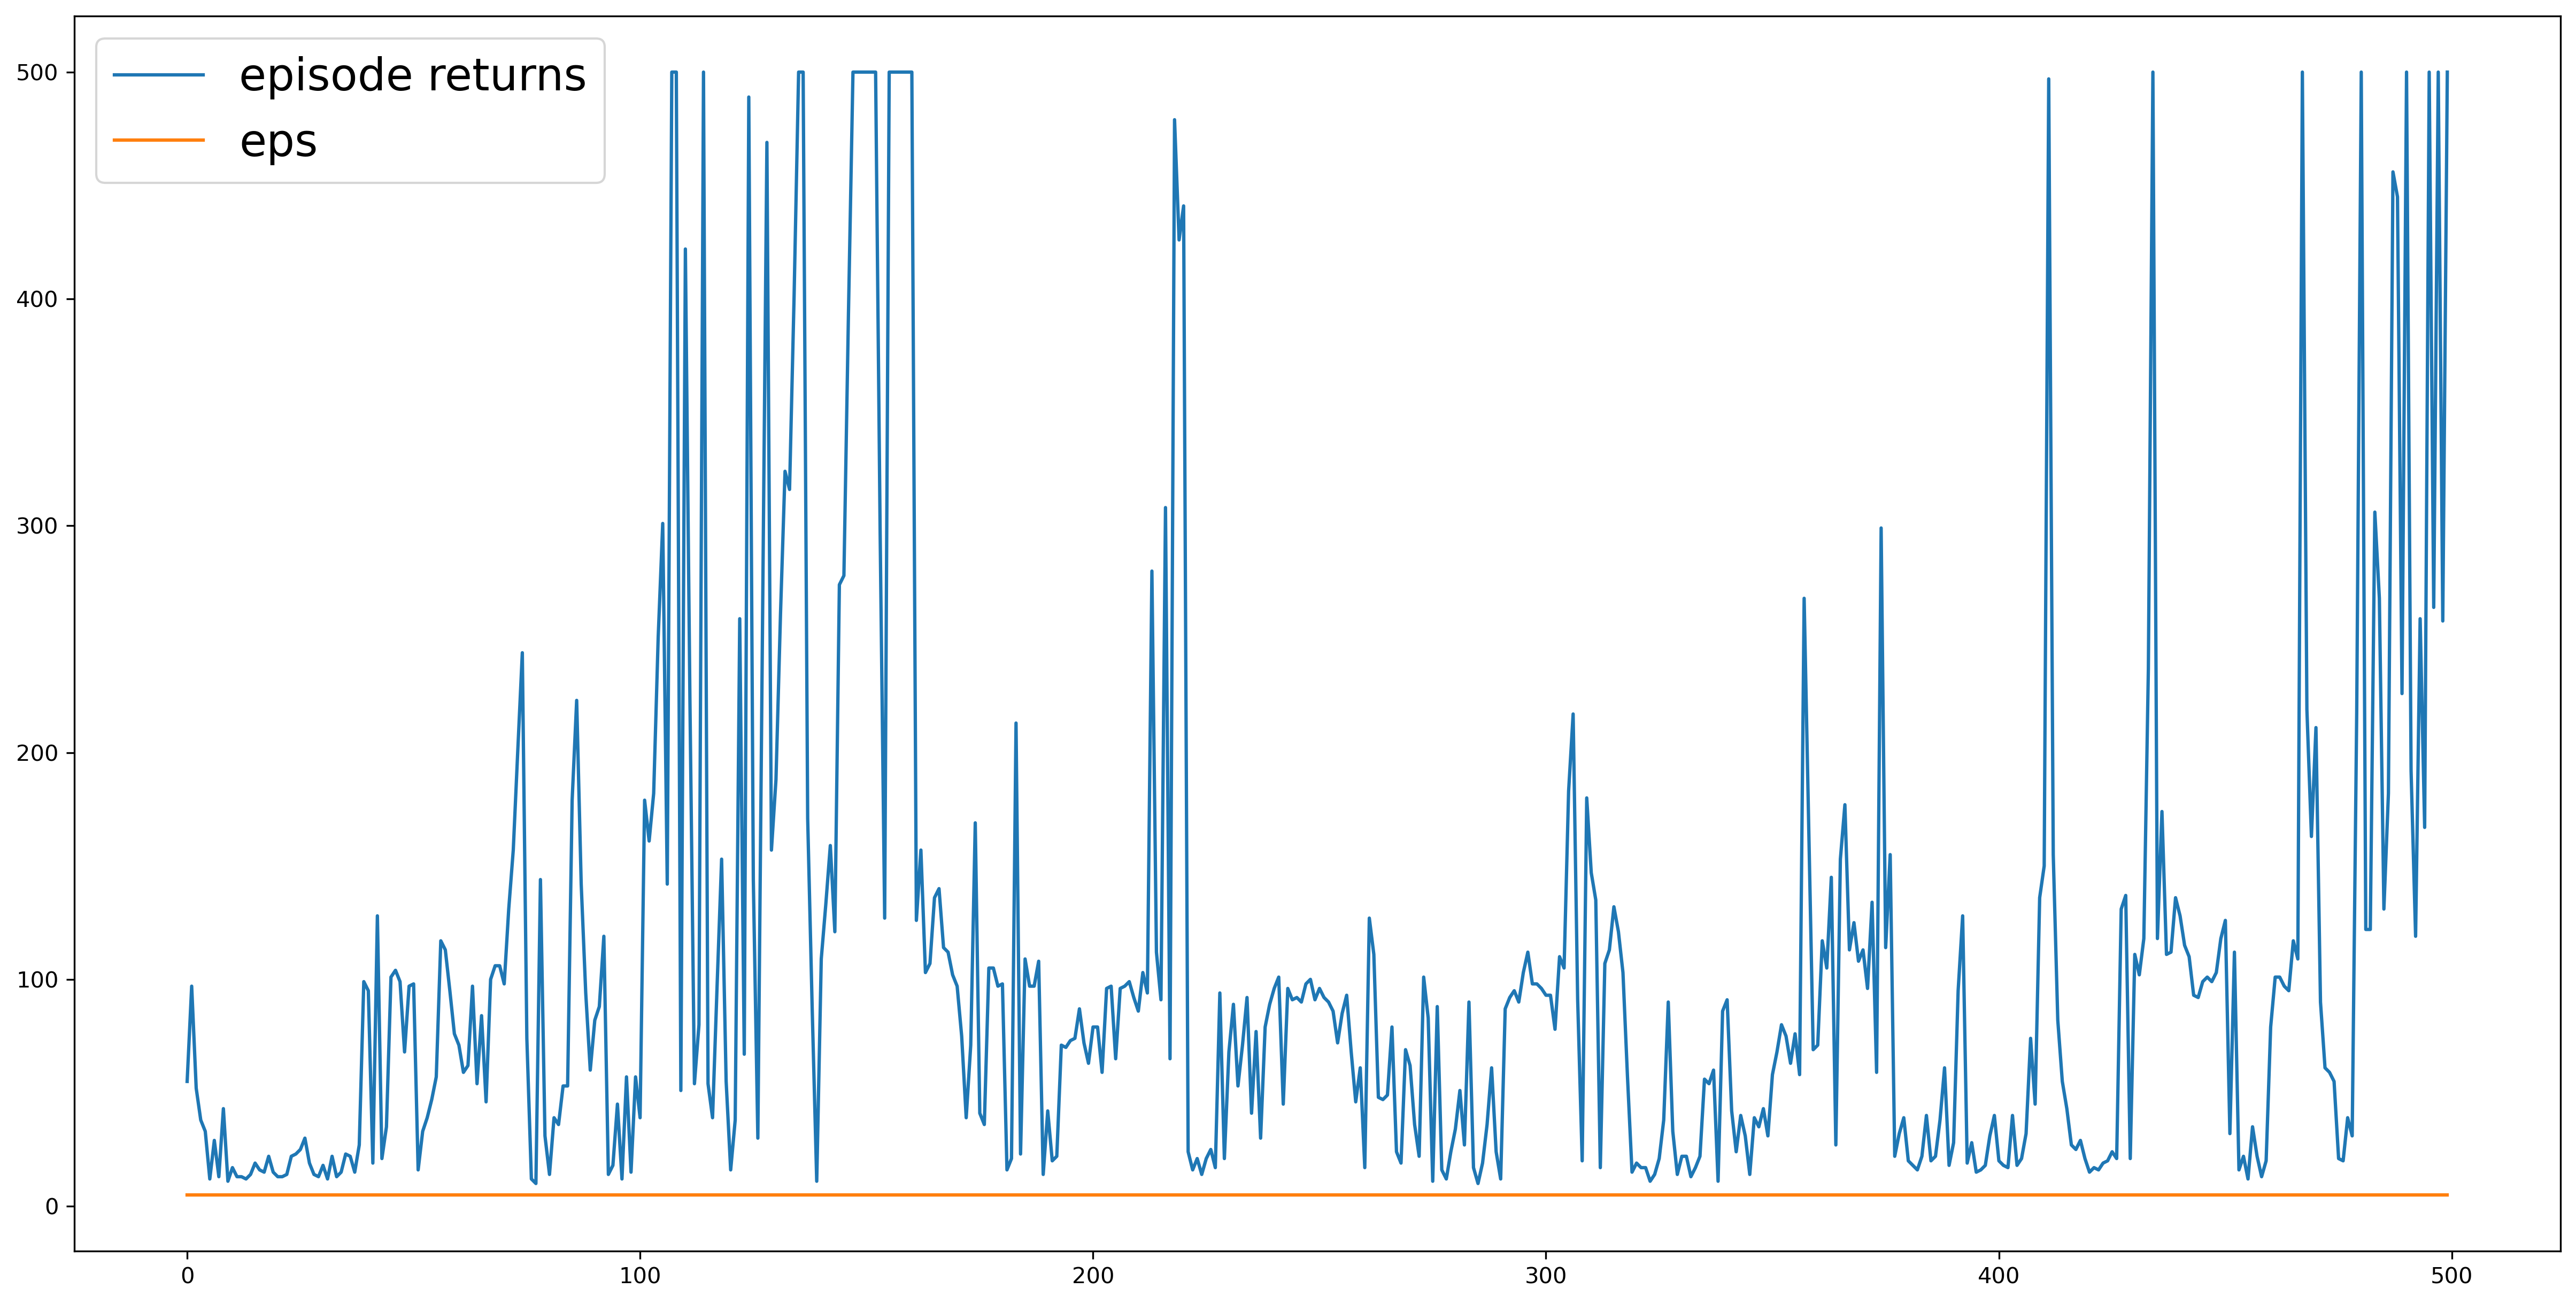

In [ ]:
plt.figure(figsize=(20, 10), dpi=300)
plt.plot(epi_rewards, label='episode returns')
plt.plot(np.array(epi_eps) * max(epi_rewards), label='eps')
plt.legend(fontsize=20)
plt.show()
plt.close()

# Choose Other Environment from Classic Control
- and solve, like CartPole-v1!